In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sy
from sympy import integrate, oo
import math as mt

#Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.0``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [3]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

In [4]:


data = {"Tiempo (s)":t, "Corriente (A)":i}
df = pd.DataFrame(data)
df

,Tiempo (s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


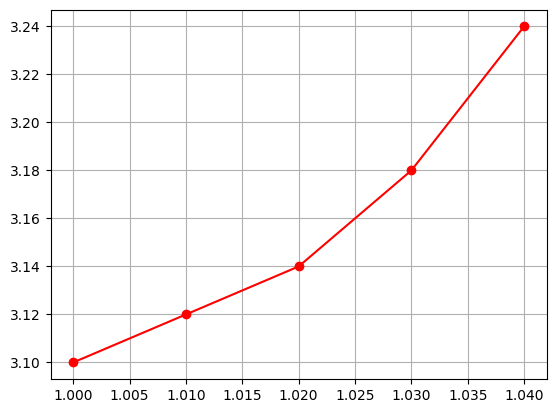

In [5]:
plt.plot(df["Tiempo (s)"], df["Corriente (A)"],"ro-")
plt.grid()

In [6]:
derivada = np.gradient(i,t)
derivada

array([2., 2., 3., 5., 6.])

In [7]:
di= np.diff(i)
dt = np.diff(t)
d = di/dt
d

array([2., 2., 4., 6.])

In [8]:
L = 0.98
R = 0.142
E_t = L*derivada + R*i
df["fem (v)"]=E_t
df

,Tiempo (s),Corriente (A),fem (v)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


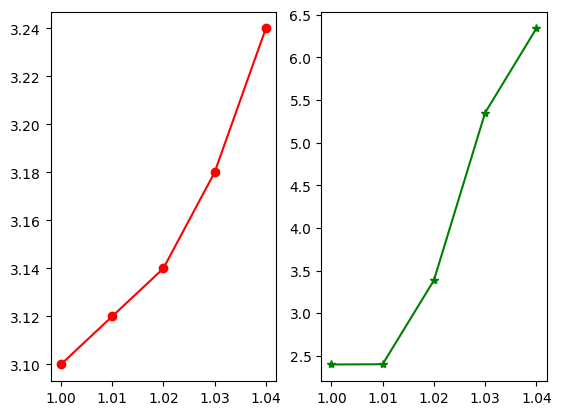

In [9]:

fig , axs = plt.subplots(1,2)

axs[0].plot(df["Tiempo (s)"], df["Corriente (A)"], "ro-")
axs[1].plot(df["Tiempo (s)"], df["fem (v)"],"g*-")

In [10]:

x0=1.00
x1 = 1.01
x2 = 1.02

In [11]:
l_0 = lambda x: ((x-x1)*(x-x2))/((x0-x1)*(x0-x2))
l_1 = lambda x: ((x-x0)*(x-x2))/((x1-x0)*(x1-x2))
l_2 = lambda x: ((x-x0)*(x-x1))/((x2-x0)*(x2-x1))
P = lambda x: l_0*3.10+l_1*3.12+l_2*3.14

In [12]:
h = 1e-2
PL =sc.interpolate.lagrange(t,i)
PL

poly1d([ -83333.33333335,  341666.66666669, -525191.66666673,
        358719.83333332,  -91858.39999999])

In [13]:

xl = np.linspace(np.min(t), np.max(t))
iL =PL(xl)

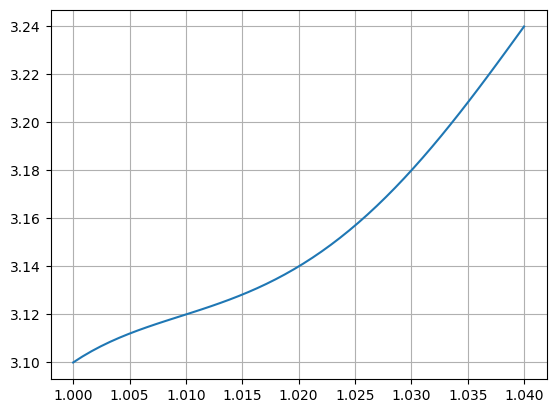

In [14]:
plt.plot(xl,iL)
plt.grid()

In [15]:
h=1e-6

deriva = 1/(2*h)*(-3*PL(xl)+4*PL(xl+h)-PL(xl+2*h))

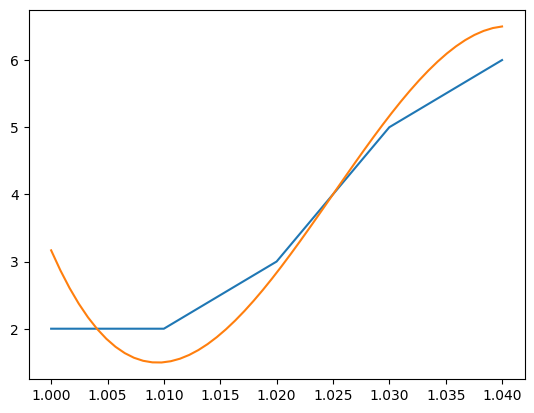

In [16]:
plt.plot(df["Tiempo (s)"],derivada)
plt.plot(xl,deriva)

##**Parte 2**

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

----
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


----

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

regla del trapecio

In [17]:
f = lambda x: 1/np.sqrt(np.tan(x))
n= 1000000
h= (np.pi/2-1e-8)/n
x = np.linspace(1e-8, np.pi/2, n)
i = range(1, n)
intg = h/2*(f(1e-8)+f(np.pi/2)+ (2*f(x[i]).sum()))
intg


2.2274525503672744

Regla de Simpson

In [18]:
from scipy.integrate import simps
def f(x):
    return 1 / np.sqrt(np.tan(x))

a = 1e-8
b = np.pi / 2
n = 10000000
x_values = np.linspace(a, b, n)
f_values = f(x_values)
integral_value=simps(f_values, x_values)
integral_value


2.2214309594391692

Metodo de la cuadratura

In [19]:
from scipy.integrate import quad
def f(x):
    return 1 / np.sqrt(np.tan(x))

def integrate_f():
    result, _ = quad(f, 1e-8, np.pi/2)
    return result
integral_value = integrate_f()
integral_value

2.22144146938126

In [20]:
def f(x):
    return 1 / np.sqrt(np.tan(x))

a = 1e-8
b = np.pi / 2
n = 100000000

x_values = np.linspace(a, b, n)
f_values = f(x_values)
integral_value = np.trapz(f_values, x_values)
print("Approximate integral:", integral_value)

Approximate integral: 2.2212507613572687


In [21]:
import numpy as np
from scipy.integrate import quad

def fa(x):
    return np.cos(x) / x**3
def integrate_f():
    result, _ = quad(fa, 1, np.inf)
    return result
integral_value = integrate_f()
integral_value



<ipython-input-21-1c4380b182b2>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(fa, 1, np.inf)


0.01811792007976691

In [22]:
a = 1
M_values = np.logspace(1, 5, 100)  # Generate values of M from 10 to 100000

def f1(x):
    return np.cos(x) / x**3

def integrate_f1(M):
    n = 10000000
    x_values = np.linspace(a, M, n)
    f1_values = f1(x_values)
    integral_value = np.trapz(f1_values, x_values)
    return integral_value
integral_values = [integrate_f1(M) for M in M_values]

final_integral_estimate = integral_values[-1]
print("Estimated Integral as M -> Infinity:", final_integral_estimate)

Estimated Integral as M -> Infinity: 0.018138140598518964


In [24]:
import sympy as sp
import numpy as np

x, y = sp.symbols("x y")

f = 1/sp.sqrt(1-y**2)
F = sp.integrate(f, y)
result = F.subs(y, sp.sin(x)) - F.subs(y, 0)
result

asin(sin(x))

In [25]:
import sympy as sp

x, y = sp.symbols("x y")

f = 1/sp.sqrt(1-y**2)
F = sp.integrate(f, y)
result = F.subs(y, sp.sin(x)) - F.subs(y, 0)
result_value = result.subs(x, sp.pi/4)-result.subs(x, 0)
result_value

pi/4

In [26]:
from sympy import *
x, y = sp.symbols("x y")
I= integrate(1/sqrt(1-y**2), (y,0,sp.sin(x)), (x, 0, sp.pi/4))
I.evalf()

0.308425137534042

In [27]:
from scipy.integrate import trapezoid, simps, quad
f = lambda x, y: 1/np.sqrt(1-y**2)
x = np.linspace(0, np.pi/4 , 10000, endpoint = True)
U= []
for x_ in x:
    y = np.linspace(0, np.sin(x_), 10000, endpoint=True)
    I_1 = trapezoid(f(x_, y), y)
    U.append(I_1)
II= trapezoid(U,x)
II

0.30842513766192337

In [28]:
import numpy as np
from scipy.integrate import trapz

f = lambda y: 1/np.sqrt(1-y**2)
x = np.linspace(0, np.pi/4 , 1000)
U = np.zeros(1000)

for i, x_ in enumerate(x):
    y = np.linspace(0, np.sin(x_), 1000)
    I_1 = trapz(f(y), y)
    U[i] = I_1

II = trapz(U, x)
II


0.3084251503452092

## Parte 3

Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto

In [45]:
def periodo_pendulo(m, g, b, theta0):

    I0 = m * b**2
    P0 = 2 * np.pi * np.sqrt(I0 / (m * g * b))
    k = np.sin(theta0 / 2)

    def integrand0(phi):
        return 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)

    result, error = quad(integrand0, 0, np.pi/2)
    P = (2 * P0 / np.pi) * result
    return P

m = 1.0
g = 9.81
b = 1.0
theta0 = np.pi / 3

P = periodo_pendulo(m, g, b, theta0)
print(f"El periodo del pendulo es {P:.4f} segundos")
m, g, b, theta0 = sp.symbols('m g b theta0')
I0 = m*b**2
omega0 = sp.sqrt(g/b)

k = sp.sin(theta0/2)
phi = sp.symbols('phi')
P0 = 2*sp.pi*sp.sqrt(I0/(m*g*b))
F = P0*(2/sp.pi)*sp.integrate(1/sp.sqrt(1 - k**2*sp.sin(phi)**2), (phi, 0, sp.pi/2))

print(f"El periodo del pendulo con el metodo de la simpson es {F.subs({m:1, g:9.8, b:1, theta0:sp.pi/3}):.4f} seconds")

El periodo del pendulo es 2.1529 segundos
El periodo del pendulo con el metodo de la simpson es 2.1540 seconds


## Parte 4

The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [50]:
import numpy as np

def aproximacion_de_la_integral(m):
    m1 = 1 - m
    a0 = 1.3862944
    b0 = 0.5
    a1 = 0.1119723
    b1 = 0.1213478
    a2 = 0.00725296
    b2 = 0.0288729

    approx = a0 + a1 * m1 + a2 * m1**2 - (b0 + b1 * m1 + b2 * m1**2) * np.log(m1)
    return approx

m_values = np.linspace(0, 1, 11)
for m in m_values:
    approx_value = aproximacion_de_la_integral(m)
    print(f"Para m = {m}, Valor aproximado = {approx_value}")

Para m = 0.0, Valor aproximado = 1.5055196599999998
Para m = 0.1, Valor aproximado = 1.5595954370750165
Para m = 0.2, Valor aproximado = 1.6178716862093916
Para m = 0.30000000000000004, Valor aproximado = 1.6819097737973638
Para m = 0.4, Valor aproximado = 1.7540038430344496
Para m = 0.5, Valor aproximado = 1.837726615305946
Para m = 0.6000000000000001, Valor aproximado = 1.9390980606339778
Para m = 0.7000000000000001, Valor aproximado = 2.069483690656785
Para m = 0.8, Valor aproximado = 2.254617050195221
Para m = 0.9, Valor aproximado = 2.5774628927231005
Para m = 1.0, Valor aproximado = inf


<ipython-input-50-e8140bb76a42>:12: RuntimeWarning: divide by zero encountered in log
  approx = a0 + a1 * m1 + a2 * m1**2 - (b0 + b1 * m1 + b2 * m1**2) * np.log(m1)


# Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
phi = np.linspace(0, np.pi/4)
tetha = np.linspace(0, np.pi/2)
a = 1
r= np.linspace(0.001, 2)
k = np.sqrt((4*a*r*np.sin(tetha))/(a**2+r**2+2*a*r*np.sin(tetha)))
k

array([0.        , 0.07304031, 0.14423803, 0.21358096, 0.28029374,
       0.34374811, 0.40348163, 0.45919834, 0.51075532, 0.55814019,
       0.60144428, 0.64083545, 0.67653326, 0.70878797, 0.73786383,
       0.76402661, 0.7875348 , 0.80863376, 0.82755231, 0.84450094,
       0.85967138, 0.87323687, 0.88535307, 0.89615918, 0.90577935,
       0.91432394, 0.92189096, 0.92856732, 0.93443001, 0.93954721,
       0.94397926, 0.94777956, 0.95099538, 0.95366849, 0.95583584,
       0.95753009, 0.95878005, 0.95961115, 0.96004577, 0.96010357,
       0.95980178, 0.95915545, 0.95817761, 0.95687956, 0.95527092,
       0.95335986, 0.95115317, 0.94865639, 0.94587392, 0.94280904])

In [ ]:
import numpy as np
from scipy.integrate import quad

def E(k, phi):
    return np.sqrt(1 - k**2 * np.sin(phi)**2)

def integrate_E(k, phi):
    def integrand(phi):
        return E(k, phi)
    result, _ = quad(integrand, 0, np.pi/2)
    return result

phi = np.linspace(0, np.pi/4)
theta = np.linspace(0, np.pi/2)
a = 1
r = np.linspace(0.001, 2)
k = np.sqrt((4*a*r*np.sin(theta))/(a**2+r**2+2*a*r*np.sin(theta)))

integral_values = [integrate_E(k_val, phi) for k_val in k]
integral_values

[1.5707963267948966,
 1.5686992210958997,
 1.5625942265294381,
 1.5527264359316344,
 1.5394740584430484,
 1.5233116974598535,
 1.50476896337969,
 1.4843907227360567,
 1.4627036876834267,
 1.4401918576603765,
 1.4172812663516632,
 1.394333006064366,
 1.3716427183568558,
 1.349444546193077,
 1.3279177349854216,
 1.3071944478273336,
 1.2873677774399968,
 1.2684993091335743,
 1.2506258800748788,
 1.233765386349733,
 1.2179216224877507,
 1.2030882153920233,
 1.1892517526614013,
 1.1763942178620563,
 1.164494842663507,
 1.1535314750421075,
 1.1434815486761858,
 1.1343227241873861,
 1.126033259859443,
 1.1185921590132692,
 1.111979134004972,
 1.1061744231485973,
 1.1011584966445411,
 1.0969116901584206,
 1.0934138086834848,
 1.0906437466720644,
 1.0885791706816335,
 1.0871963057620164,
 1.0864698554808567,
 1.0863730686828004,
 1.0868779466011182,
 1.0879555657796023,
 1.089576479231965,
 1.0917111526697876,
 1.094330394608428,
 1.0974057469525755,
 1.1009098135175581,
 1.1048165151432914,
 1

In [ ]:
def K(k, phi):
    return np.sqrt(1/(1 - k**2 * np.sin(phi)**2))

def integrate_K(k, phi):
    def integrande(phi):
        return K(k, phi)
    result1, _ = quad(integrande, 0, np.pi/2)
    return result1

phi = np.linspace(0, np.pi/4)
theta = np.linspace(0, np.pi/2)
a = 1
r = np.linspace(0.001, 2)
k = np.sqrt((4*a*r*np.sin(theta))/(a**2+r**2+2*a*r*np.sin(theta)))

integral_values_K = [integrate_K(k_val, phi) for k_val in k]
integral_values_K

[1.5707963267948966,
 1.5728976424407246,
 1.5790632910611355,
 1.5891847568932662,
 1.6030911718448748,
 1.6205613543852768,
 1.64133802075781,
 1.6651423609688056,
 1.6916874527575663,
 1.7206894679372884,
 1.7518761487645513,
 1.7849924782779187,
 1.8198037787765997,
 1.8560966404791015,
 1.893678133955452,
 1.932373733127383,
 1.97202430649107,
 2.0124824503586667,
 2.053608357509703,
 2.095265348167456,
 2.1373151430870108,
 2.179612933567214,
 2.2220023023736464,
 2.264310075099134,
 2.306341236034489,
 2.347874128518134,
 2.3886562771491686,
 2.428401312935134,
 2.4667876371053685,
 2.503459594329715,
 2.5380319915800946,
 2.570098727191131,
 2.5992460124520282,
 2.6250701234712968,
 2.6471988244669356,
 2.6653146678167636,
 2.6791775287794732,
 2.688643271352278,
 2.6936756244831788,
 2.6943492582833155,
 2.690843512916191,
 2.683427851279176,
 2.672441417774055,
 2.6582697553015877,
 2.6413216768514944,
 2.6220086632122914,
 2.600728250834992,
 2.5778519664037596,
 2.553717647

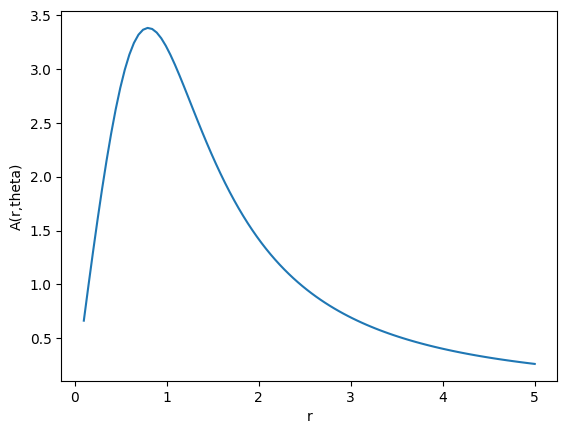

In [ ]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np

f = lambda phi, k: 1/np.sqrt(1 - k**2*(np.sin(phi))**2)
g = lambda phi, k: np.sqrt(1 - k**2*(np.sin(phi))**2)

def KK(k, f):
    I = quad(f, 0, np.pi/2, args=(k, ))[0]
    return I

def EE(k, g):
    I = quad(g, 0, np.pi/2, args=(k, ))[0]
    return I

def k_cuadrado(r, theta, a):
    n = 4*a*r*np.sin(theta)/(a**2 + r**2 + 2*a*r*np.sin(theta))
    return n

def Apotencial(r, theta, a, I):
    n = 4*I*a
    d = np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))
    PT = n/d
    k_2 = k_cuadrado(r, theta, a)
    k = np.sqrt(k_2)

    ST = (((2-k_2)*KK(k, f)) - 2*EE(k, g))/k_2
    A = PT*ST
    return A

a = 1
I = 3
r = np.linspace(0.1, 5.0, 100)

theta = np.pi/4

A = np.zeros(len(r))
for i, r_val in enumerate(r):
    A[i] = Apotencial(r_val, theta, a, I)

plt.plot(r, A)
plt.xlabel("r")
plt.ylabel("A(r,theta)")
plt.show()